<a href="https://colab.research.google.com/github/Rohawaseem/Task-2/blob/main/Week5_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
from google.colab import files
uploaded = files.upload()

# Replace file name with your dataset name
df = pd.read_csv('twitter_sentiment_200.csv')

# Show first 5 rows
df.head()


Saving twitter_sentiment_200.csv to twitter_sentiment_200.csv


,Tweet ID,Username,Tweet Text,Retweets,Favorites,Followers,Timestamp,Sentiment
0,05a72860-7fbf-4565-a43c-961b732f0240,samanthagillespie,Talk get bag focus pattern necessary. Step com...,81,14,409,2022-11-07 18:49:55.793691,Neutral
1,0c3735c8-3d67-4c50-b639-14010e918d31,rfisher,Front measure modern design. Policy go start f...,35,31,3657,2023-01-21 21:51:43.768392,Positive
2,044365c9-0e4a-46ce-9a00-1e5d184ec5b7,bgarcia,Lead which daughter join. Yeah world sort pers...,94,13,8935,2021-07-09 06:55:03.007612,Positive
3,f37cc2c8-4ebf-483b-a970-ef9c2e0f4d37,robert13,Morning first receive. Special land oil.\nWond...,75,54,520,2022-09-28 21:08:48.969174,Positive
4,c78dd47e-df0d-47ff-9c29-de9287a96429,erinwalker,Artist church ago. Gun hold bank plan natural ...,11,27,3811,2020-04-03 21:17:33.227220,Neutral


In [3]:
# Convert Sentiment to numeric codes
df['SentimentCode'] = df['Sentiment'].astype('category').cat.codes

# Select features (independent variables)
X = df[['Retweets', 'Favorites', 'Followers']]

# Target variable (dependent)
y = df['SentimentCode']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)


In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.7387306609034898
Root Mean Squared Error (RMSE): 0.8500274943039057


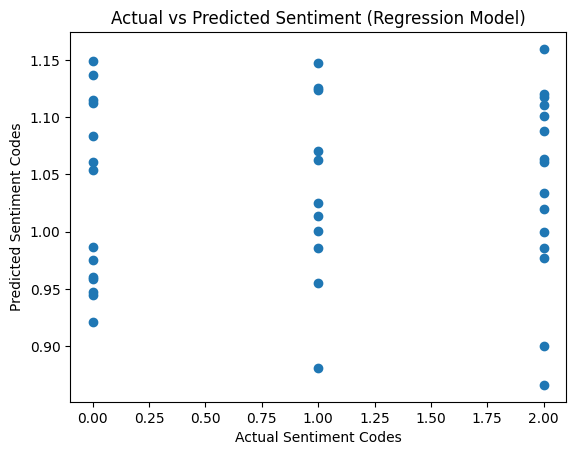

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sentiment Codes")
plt.ylabel("Predicted Sentiment Codes")
plt.title("Actual vs Predicted Sentiment (Regression Model)")
plt.show()
